In [30]:
import pandas as pd 
import numpy as np 

# Getting the data

In [37]:
X= pd.read_csv("./datasets/NeuralNetwork1_X_Train.csv")
Y = pd.read_csv("./datasets/NeuralNetwork1_Y_Train.csv")
print(X.shape, Y.shape)


(2250, 2) (2250, 1)
      label
0         0
1         0
2         1
3         0
4         1
5         0
6         0
7         0
8         0
9         1
10        0
11        1
12        1
13        0
14        1
15        0
16        1
17        0
18        1
19        1
20        1
21        0
22        0
23        1
24        0
25        1
26        0
27        0
28        0
29        1
...     ...
2220      0
2221      0
2222      1
2223      1
2224      1
2225      0
2226      1
2227      0
2228      1
2229      0
2230      1
2231      1
2232      1
2233      1
2234      1
2235      1
2236      0
2237      1
2238      0
2239      0
2240      0
2241      0
2242      1
2243      0
2244      0
2245      1
2246      1
2247      1
2248      1
2249      0

[2250 rows x 1 columns]


# Making the Neural network model

In [32]:
from keras.layers import Dense
from keras import models

In [42]:
# defining the model
model = models.Sequential()

model.add(Dense(2, activation='sigmoid', input_shape=(2,)))
#model.add(Dense(1,activation='sigmoid'))

#compiling the model
model.compile(optimizer= 'adam', metrics=["accuracy"], loss= "binary_crossentropy")
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


# Training the model

Train on 1800 samples, validate on 450 samples
Epoch 1/100
1800/1800 [==============================] - 0s 194us/step - loss: 0.7859 - accuracy: 0.4422 - val_loss: 0.7670 - val_accuracy: 0.4678
Epoch 2/100
1800/1800 [==============================] - 0s 98us/step - loss: 0.7608 - accuracy: 0.4578 - val_loss: 0.7434 - val_accuracy: 0.4733
Epoch 3/100
1800/1800 [==============================] - 0s 97us/step - loss: 0.7376 - accuracy: 0.4750 - val_loss: 0.7212 - val_accuracy: 0.4944
Epoch 4/100
1800/1800 [==============================] - 0s 88us/step - loss: 0.7158 - accuracy: 0.4914 - val_loss: 0.7006 - val_accuracy: 0.5044
Epoch 5/100
1800/1800 [==============================] - 0s 101us/step - loss: 0.6955 - accuracy: 0.5042 - val_loss: 0.6810 - val_accuracy: 0.5156
Epoch 6/100
1800/1800 [==============================] - 0s 86us/step - loss: 0.6764 - accuracy: 0.5206 - val_loss: 0.6630 - val_accuracy: 0.5278
Epoch 7/100
1800/1800 [==============================] - 0s 77us/step - los

1800/1800 [==============================] - 0s 97us/step - loss: 0.3704 - accuracy: 0.8131 - val_loss: 0.3590 - val_accuracy: 0.8278
Epoch 57/100
1800/1800 [==============================] - 0s 80us/step - loss: 0.3684 - accuracy: 0.8139 - val_loss: 0.3568 - val_accuracy: 0.8311
Epoch 58/100
1800/1800 [==============================] - 0s 70us/step - loss: 0.3664 - accuracy: 0.8156 - val_loss: 0.3545 - val_accuracy: 0.8322
Epoch 59/100
1800/1800 [==============================] - 0s 75us/step - loss: 0.3645 - accuracy: 0.8172 - val_loss: 0.3525 - val_accuracy: 0.8333
Epoch 60/100
1800/1800 [==============================] - 0s 88us/step - loss: 0.3626 - accuracy: 0.8186 - val_loss: 0.3503 - val_accuracy: 0.8344
Epoch 61/100
1800/1800 [==============================] - 0s 101us/step - loss: 0.3607 - accuracy: 0.8200 - val_loss: 0.3483 - val_accuracy: 0.8356
Epoch 62/100
1800/1800 [==============================] - 0s 89us/step - loss: 0.3589 - accuracy: 0.8214 - val_loss: 0.3463 - val_

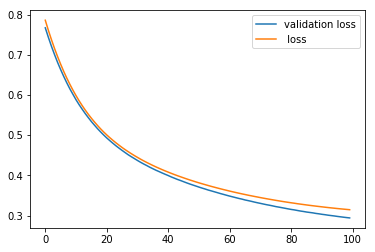

In [43]:
# prepare the data
X= np.array(X)
Y= np.array(Y)
from keras.utils import to_categorical
split = int(0.8*X.shape[0])
Xtrain=X[:split]
Xval= X[split:]

Ytrain= Y[:split]
Yval= Y[split:]
Ytrain= to_categorical(Ytrain)
Yval= to_categorical(Yval)
h= model.fit(Xtrain, Ytrain, epochs = 100 , validation_data= (Xval, Yval))
hist = h.history
print(hist)

import matplotlib.pyplot as plt
plt.plot(hist["val_loss"],label= "validation loss")
plt.plot(hist["loss"],label= " loss")
plt.legend()
plt.show()


In [35]:
Xtest= pd.read_csv("./datasets/NeuralNetwork1_X_Test.csv")
Ytest = model.predict(Xtest)
print(Xtest.shape, Ytest.shape)

(750, 2) (750, 1)


In [39]:
Ytest= np.array(Ytest)
Ytest[Ytest>=0.5]= int(1)
Ytest[Ytest<0.5]= int(0 )
Ytest= pd.DataFrame(Ytest)
Ytest.columns= ["label"]
Ytest.to_csv("./datasets/result_NeuralNetwork1.csv", header= True, index= False)
# 84% using neural network

# Using Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X,Y)
lr.score(X,Y)

C:\Users\vindyanchal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vindyanchal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8675555555555555